___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [8]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [12]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [14]:
#CODE HERE
df.isna().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [16]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [24]:
len(df[df["review"].str.isspace()])

27

27

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [31]:
df = df[df["review"].str.isspace() == False]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [37]:
#CODE HERE
df["label"].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [138]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer
cv_neg = CountVectorizer(stop_words="english")
cv_pos = CountVectorizer(stop_words="english")

In [59]:
neg_df = df[df["label"] == "neg"]

In [131]:
pos_df = df[df["label"] == "pos"]

In [142]:
sparse_matrix_neg = cv_neg.fit_transform(neg_df["review"])

In [144]:
sparse_matrix_pos = cv_pos.fit_transform(pos_df["review"])

In [186]:
my_list_neg = (sparse_matrix_neg.sum(axis=0).tolist()[0])
cv_neg_swapped = dict((v,k) for k,v in cv_neg.vocabulary_.items())
neg_word_to_count = {cv_neg_swapped[i]: my_list_neg[i] for i in cv_neg_swapped.keys()}

In [206]:
neg_word_to_count_list = list(neg_word_to_count.items())
neg_word_to_count_list

[('films', 623),
 ('like', 1808),
 ('mouse', 15),
 ('hunt', 35),
 ('theatres', 8),
 ('isn', 475),
 ('law', 70),
 ('diabolical', 9),
 ('load', 15),
 ('claptrap', 1),
 ('steven', 72),
 ('speilberg', 2),
 ('dreamworks', 6),
 ('studio', 91),
 ('hollywood', 251),
 ('family', 211),
 ('fare', 38),
 ('deadly', 31),
 ('worst', 242),
 ('takes', 262),
 ('bare', 19),
 ('threads', 6),
 ('plot', 888),
 ('tries', 212),
 ('prop', 3),
 ('overacting', 16),
 ('flat', 82),
 ('stupid', 196),
 ('slapstick', 34),
 ('makes', 415),
 ('comedies', 35),
 ('jingle', 9),
 ('way', 734),
 ('look', 417),
 ('decent', 97),
 ('comparison', 32),
 ('writer', 148),
 ('adam', 46),
 ('rifkin', 2),
 ('director', 627),
 ('gore', 45),
 ('verbinski', 1),
 ('names', 56),
 ('chiefly', 1),
 ('responsible', 31),
 ('swill', 4),
 ('worth', 144),
 ('concerns', 14),
 ('brothers', 102),
 ('nathan', 7),
 ('lane', 14),
 ('appalling', 10),
 ('lee', 133),
 ('evens', 2),
 ('inherit', 2),
 ('poorly', 77),
 ('run', 157),
 ('string', 17),
 ('fact

In [208]:
top_20_neg = sorted(neg_word_to_count_list, key = lambda x: x[1], reverse = True)[:20]
top_20_neg

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [160]:
cv_neg_swapped = dict((v,k) for k,v in cv_neg.vocabulary_.items())

In [166]:
neg_list = [(cv_neg_swapped[i], i) for i in my_list_neg[0:20]]

In [170]:
neg_list

[('champ', 4063),
 ('branch', 3131),
 ('attracting', 1808),
 ('arcs', 1480),
 ('amends', 1127),
 ('amblyn', 1117),
 ('alienates', 997),
 ('airheads', 926),
 ('aiello', 908),
 ('agreeing', 888),
 ('afoot', 838),
 ('affect', 813),
 ('adolescence', 743),
 ('admission', 734),
 ('additionally', 696),
 ('adapting', 683),
 ('actuality', 666),
 ('actioner', 648),
 ('acquit', 635),
 ('acquires', 634)]

4063

In [212]:
my_list_pos = (sparse_matrix_pos.sum(axis=0).tolist()[0])
cv_pos_swapped = dict((v,k) for k,v in cv_pos.vocabulary_.items())
pos_word_to_count = {cv_pos_swapped[i]: my_list_pos[i] for i in cv_pos_swapped.keys()}

In [214]:
pos_word_to_count_list = list(pos_word_to_count.items())
pos_word_to_count_list

[('extraordinary', 43),
 ('year', 455),
 ('australian', 25),
 ('films', 851),
 ('shine', 26),
 ('just', 1273),
 ('scooped', 2),
 ('pool', 15),
 ('film', 5002),
 ('institute', 5),
 ('awards', 27),
 ('picking', 16),
 ('best', 788),
 ('actor', 270),
 ('director', 564),
 ('add', 71),
 ('gritty', 20),
 ('life', 1032),
 ('anguish', 7),
 ('courage', 28),
 ('friendship', 43),
 ('group', 194),
 ('male', 58),
 ('prisoners', 34),
 ('hiv', 5),
 ('positive', 30),
 ('section', 17),
 ('jail', 41),
 ('love', 634),
 ('catastrophes', 3),
 ('low', 77),
 ('budget', 68),
 ('gem', 26),
 ('straight', 76),
 ('gay', 69),
 ('near', 105),
 ('university', 16),
 ('campus', 8),
 ('recall', 30),
 ('rich', 118),
 ('varied', 4),
 ('celluloid', 7),
 ('library', 9),
 ('unleashed', 1),
 ('australia', 18),
 ('bookend', 7),
 ('stand', 77),
 ('dead', 194),
 ('heart', 173),
 ('opening', 147),
 ('credits', 87),
 ('theme', 80),
 ('division', 5),
 ('established', 16),
 ('cast', 399),
 ('clear', 103),
 ('distinct', 10),
 ('lines

In [216]:
top_20_pos = sorted(pos_word_to_count_list, key = lambda x: x[1], reverse = True)[:20]
top_20_pos

[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

In [210]:
top_20_neg

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [220]:
#CODE HERE
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [224]:
X = df["review"]

In [226]:
y = df["label"]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [238]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [244]:
tfidf = TfidfVectorizer(stop_words="english")

In [ ]:
svc = LinearSVC()

In [254]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

In [256]:
pipe.fit(X_train, y_train)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [258]:
pipe

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [262]:
#CODE HERE
from sklearn.metrics import classification_report, confusion_matrix

In [264]:
y_preds = pipe.predict(X_test)

In [266]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



In [268]:
confusion_matrix(y_test, y_preds)

array([[164,  27],
       [ 38, 159]], dtype=int64)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



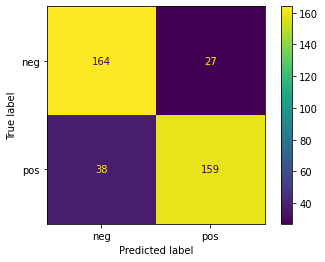

## Great job!